In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries and Data

###Importing relevant libraries

In [ ]:

#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable

###Importing data to take a look at its features

In [ ]:
applicant_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/applicant.csv')
loan_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan.csv")


In [ ]:
applicant_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [ ]:
loan_df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


# Exploratory Data Analysis

## 1. applicant_df

In [ ]:
#shape
print(f"Shape of the applicant dataframe : {applicant_df.shape}")

Shape of the applicant dataframe : (1000, 15)


In [ ]:
#df info
applicant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [ ]:
# dataframe summary
applicant_df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,1000.0,1514763.121,228676.373346,1105364.0,1321398.0,1529114.5,1707751.75,1903505.0
Primary_applicant_age_in_years,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Number_of_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
Years_at_current_residence,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Foreign_worker,1000.0,0.963,0.188856,0.0,1.0,1.0,1.00,1.0


In [ ]:
#checking for duplicated values
applicant_df.duplicated().sum()

0

In [ ]:
#percentage of null values
applicant_df.isna().sum()/len(applicant_df)*100

applicant_id                                                 0.0
Primary_applicant_age_in_years                               0.0
Gender                                                       0.0
Marital_status                                               0.0
Number_of_dependents                                         0.0
Housing                                                      0.0
Years_at_current_residence                                   0.0
Employment_status                                            0.0
Has_been_employed_for_at_least                               6.2
Has_been_employed_for_at_most                               25.3
Telephone                                                   59.6
Foreign_worker                                               0.0
Savings_account_balance                                     18.3
Balance_in_existing_bank_account_(lower_limit_of_bucket)    66.8
Balance_in_existing_bank_account_(upper_limit_of_bucket)    45.7
dtype: float64

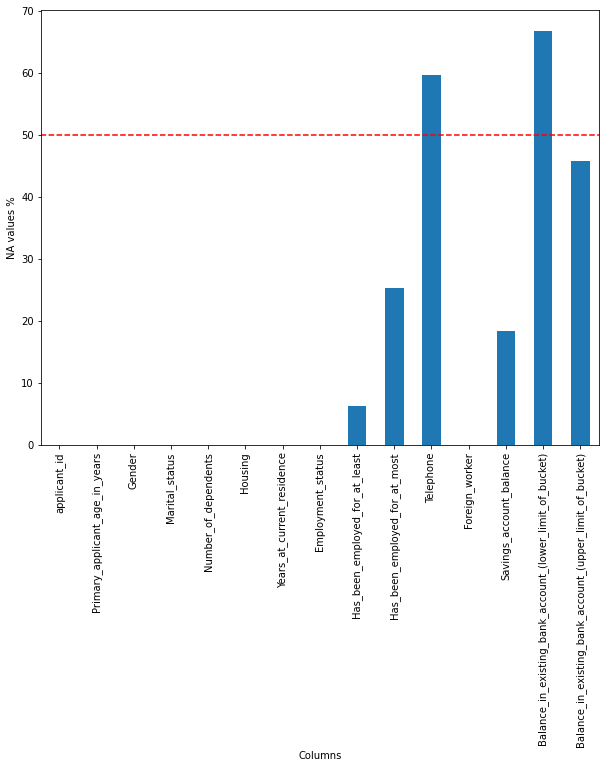

In [ ]:
#percentage of null values in each column of applicant df
plt.figure(figsize=(10,8))
(applicant_df.isna().sum()/len(applicant_df)*100).plot(kind='bar')
plt.hlines(50,-2,15,linestyle='dashed',color='red')
plt.xlabel("Columns")
plt.ylabel("NA values %")
plt.show()

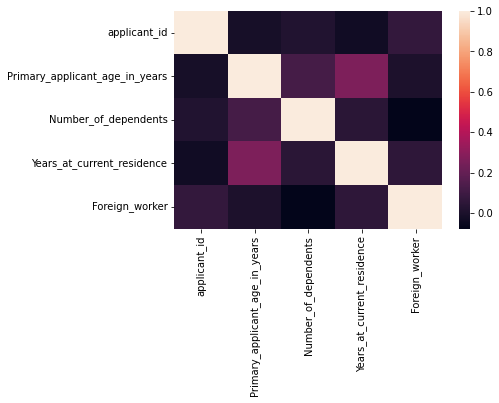

In [ ]:
#checking correlation of features
sns.heatmap(applicant_df.corr())

there is almost no correlation among the features

## 2. loan df

In [ ]:
#shape
print(f"Shape of the loan dataframe : {loan_df.shape}")

Shape of the loan dataframe : (1000, 13)


In [ ]:
#df info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

In [ ]:
#df summary
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,1000.0,1514763.121,2.286764e+05,1105364.0,1321398.0,1529114.5,1707751.75,1903505.0
Months_loan_taken_for,1000.0,20.903,1.205881e+01,4.0,12.0,18.0,24.00,72.0
Principal_loan_amount,1000.0,3271258.000,2.822737e+06,250000.0,1365500.0,2319500.0,3972250.00,18424000.0
EMI_rate_in_percentage_of_disposable_income,1000.0,2.973,1.118715e+00,1.0,2.0,3.0,4.00,4.0
Has_coapplicant,1000.0,0.041,1.983894e-01,0.0,0.0,0.0,0.00,1.0
Has_guarantor,1000.0,0.052,2.221381e-01,0.0,0.0,0.0,0.00,1.0
Number_of_existing_loans_at_this_bank,1000.0,1.407,5.776545e-01,1.0,1.0,1.0,2.00,4.0
high_risk_applicant,1000.0,0.300,4.584869e-01,0.0,0.0,0.0,1.00,1.0


In [ ]:
#checking for duplicated values
loan_df.duplicated().sum()

0

In [ ]:
#percentage of null values
loan_df.isna().sum()/len(loan_df)*100

loan_application_id                             0.0
applicant_id                                    0.0
Months_loan_taken_for                           0.0
Purpose                                         1.2
Principal_loan_amount                           0.0
EMI_rate_in_percentage_of_disposable_income     0.0
Property                                       15.4
Has_coapplicant                                 0.0
Has_guarantor                                   0.0
Other_EMI_plans                                81.4
Number_of_existing_loans_at_this_bank           0.0
Loan_history                                    0.0
high_risk_applicant                             0.0
dtype: float64

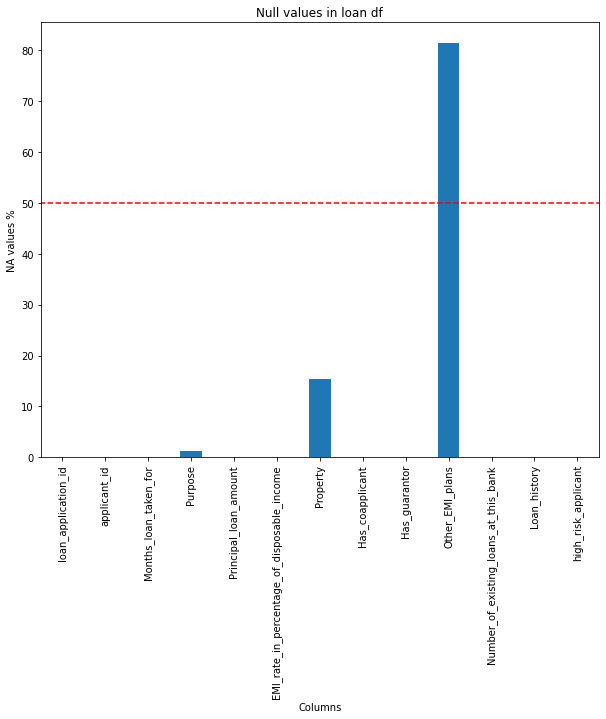

In [ ]:
#percentage of null values in each column of loan df
plt.figure(figsize=(10,8))
plt.title("Null values in loan df")
(loan_df.isna().sum()/len(loan_df)*100).plot(kind='bar')
plt.hlines(50,-2,15,linestyle='dashed',color='red')
plt.xlabel("Columns")
plt.ylabel("NA values %")
plt.show()

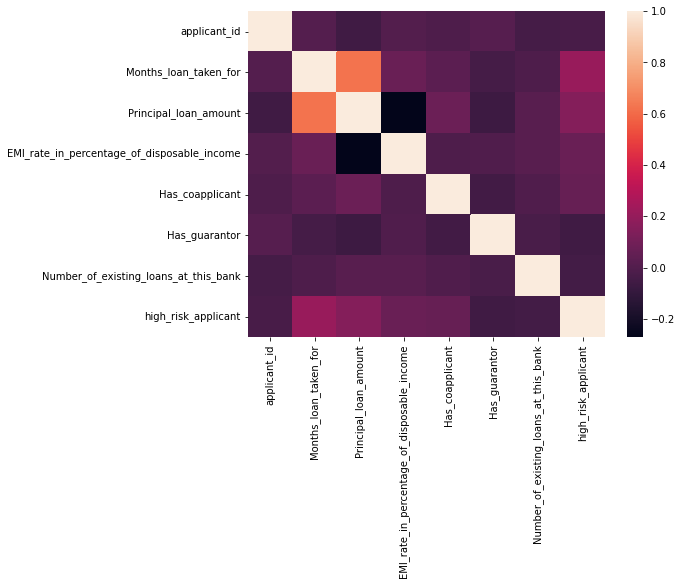

In [ ]:
#checking correlation of features
plt.figure(figsize=(8,6))
sns.heatmap(loan_df.corr())
plt.show()



*   There is a slight positive correlation between Principal loan amount and the months the loan is taken for. This is justified as the time for which the loan is taken will be higher for larger loans.



## 3. Both df combined

In [ ]:
#merging both the dataframes on applicant_id
df = pd.merge(loan_df,applicant_df,on="applicant_id",how='left')
df.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [ ]:
print("Shape of the df is : ",df.shape)

Shape of the df is :  (1000, 27)


In [ ]:
#df info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   loan_application_id                                       1000 non-null   object
 1   applicant_id                                              1000 non-null   int64 
 2   Months_loan_taken_for                                     1000 non-null   int64 
 3   Purpose                                                   988 non-null    object
 4   Principal_loan_amount                                     1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income               1000 non-null   int64 
 6   Property                                                  846 non-null    object
 7   Has_coapplicant                                           1000 non-null   int64 
 8   Has_guarantor                

In [ ]:
#percentage of null values
df.isna().sum()/len(df)*100

loan_application_id                                          0.0
applicant_id                                                 0.0
Months_loan_taken_for                                        0.0
Purpose                                                      1.2
Principal_loan_amount                                        0.0
EMI_rate_in_percentage_of_disposable_income                  0.0
Property                                                    15.4
Has_coapplicant                                              0.0
Has_guarantor                                                0.0
Other_EMI_plans                                             81.4
Number_of_existing_loans_at_this_bank                        0.0
Loan_history                                                 0.0
high_risk_applicant                                          0.0
Primary_applicant_age_in_years                               0.0
Gender                                                       0.0
Marital_status           

In [ ]:
#checking the number of unique values in each column
df.nunique()

loan_application_id                                         1000
applicant_id                                                1000
Months_loan_taken_for                                         33
Purpose                                                        9
Principal_loan_amount                                        921
EMI_rate_in_percentage_of_disposable_income                    4
Property                                                       3
Has_coapplicant                                                2
Has_guarantor                                                  2
Other_EMI_plans                                                2
Number_of_existing_loans_at_this_bank                          4
Loan_history                                                   5
high_risk_applicant                                            2
Primary_applicant_age_in_years                                53
Gender                                                         2
Marital_status           

##### Correlation heatmap

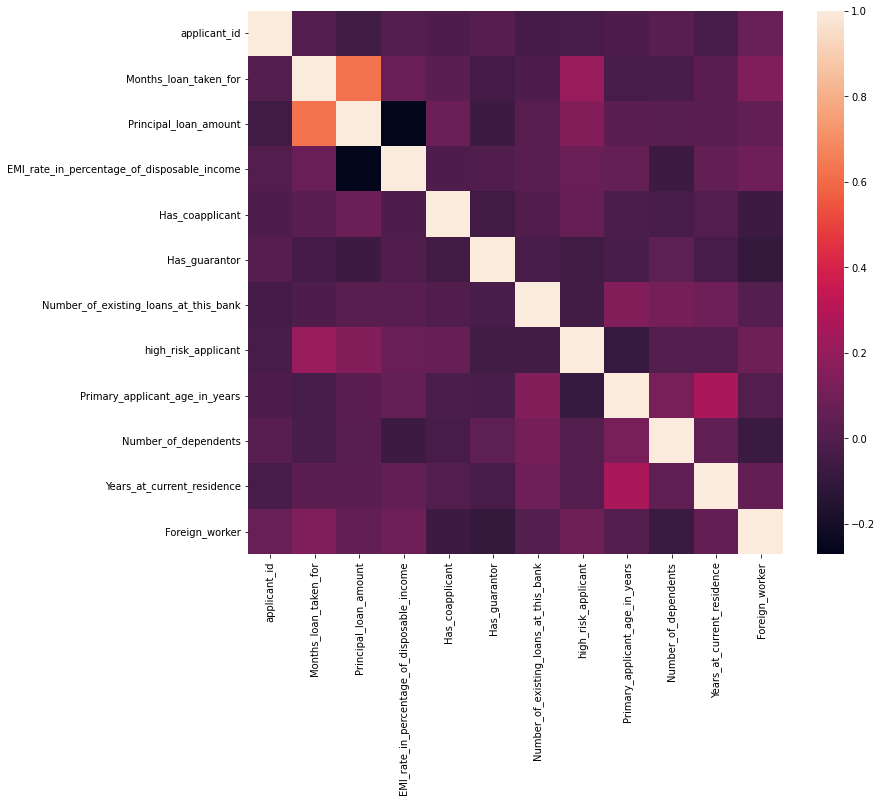

In [ ]:
#checking correlation of features
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

No new trends are observed

#### Seaborn Pairplots

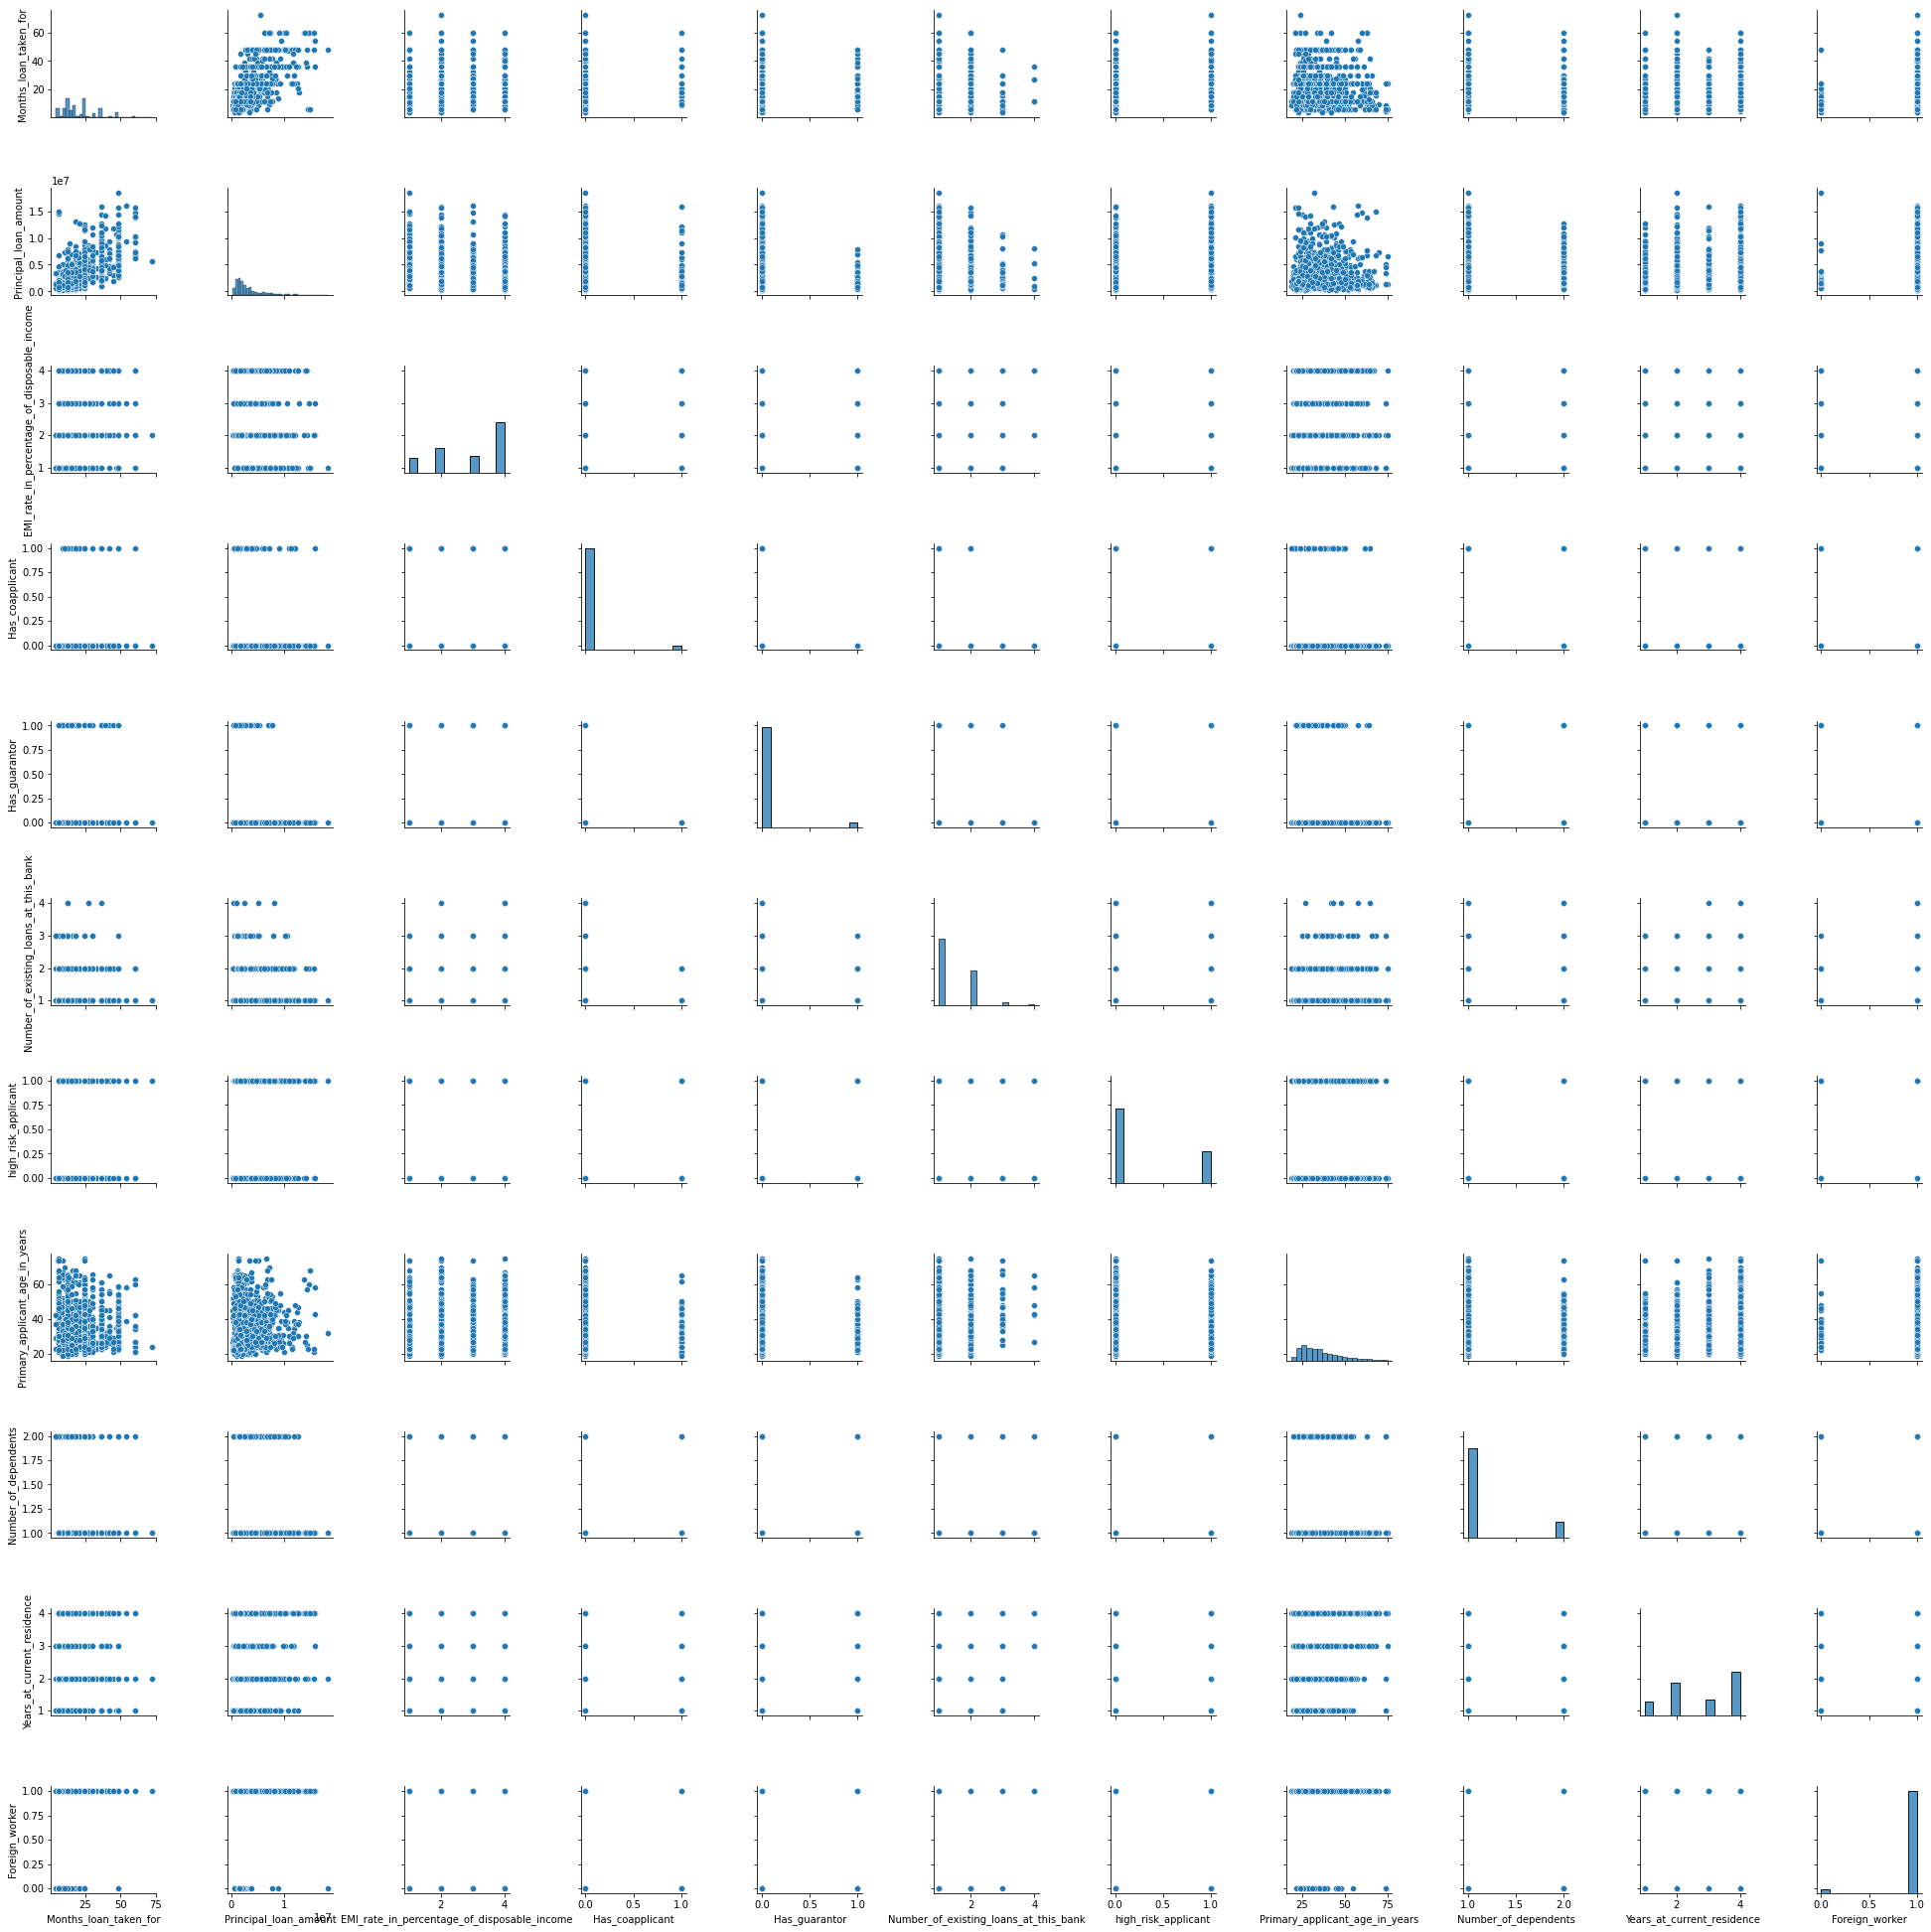

In [ ]:
#looking at the relationships between the features
#features which are not useful
to_drop = ['Telephone','loan_application_id','applicant_id']
sns.pairplot(df.drop(to_drop,axis=1))

#### autoEDA using sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.1 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


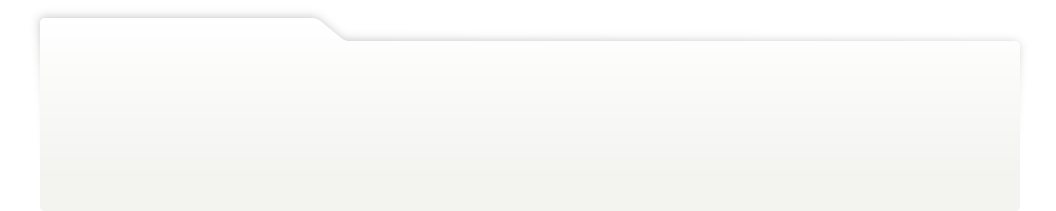
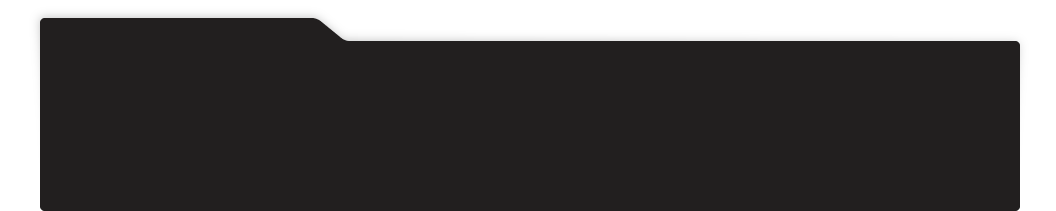
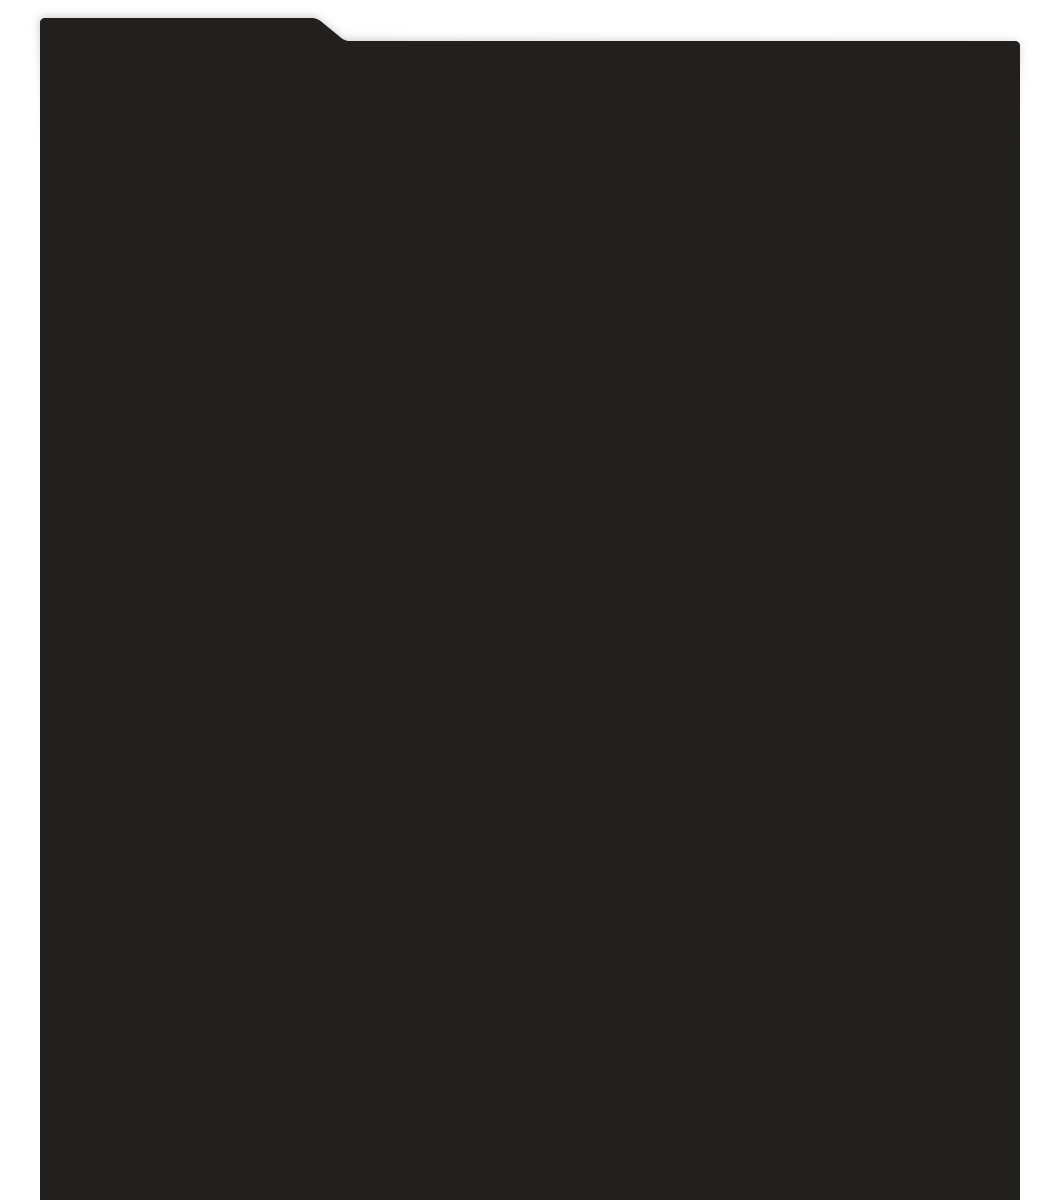
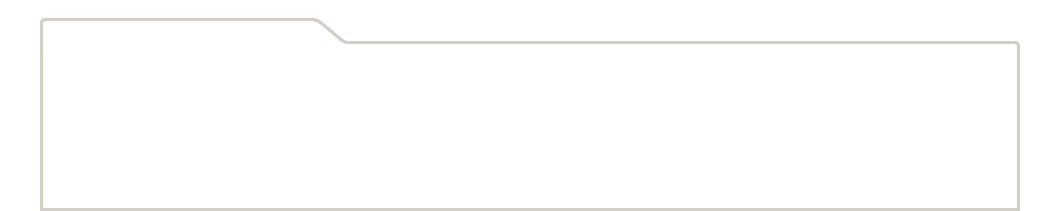
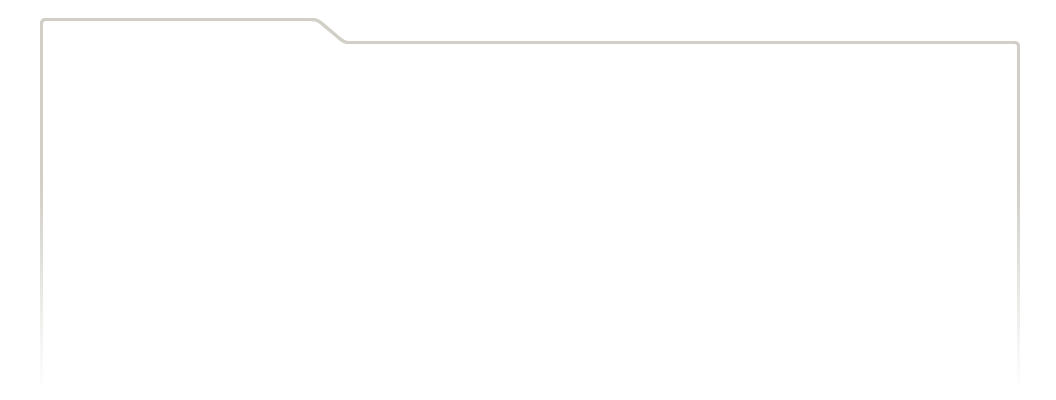
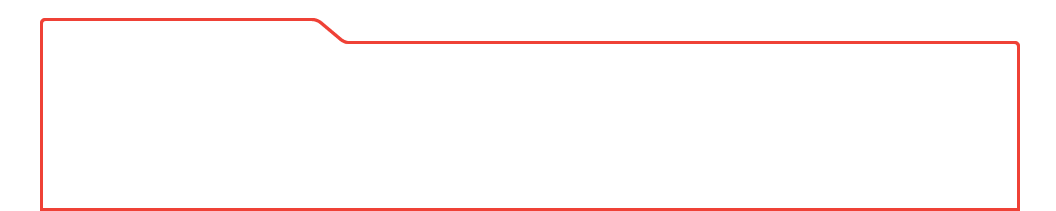
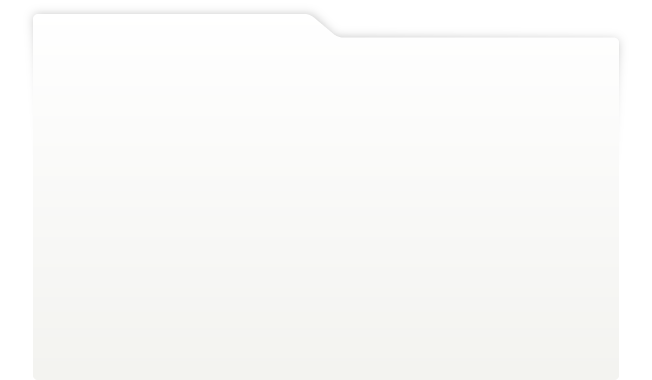
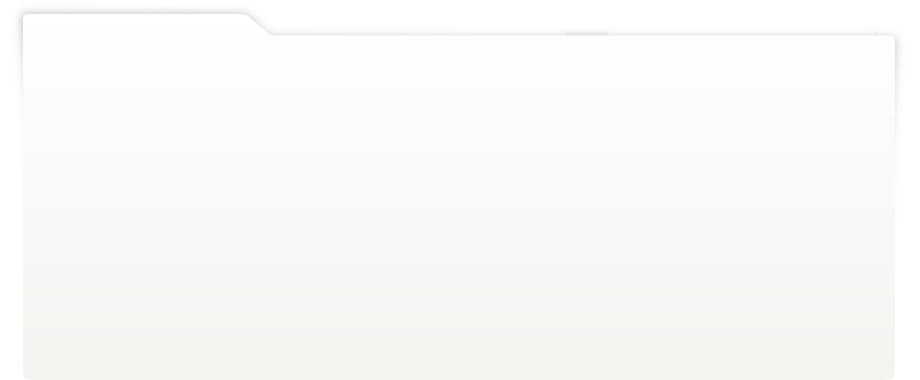
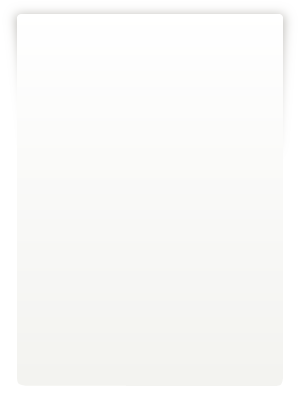
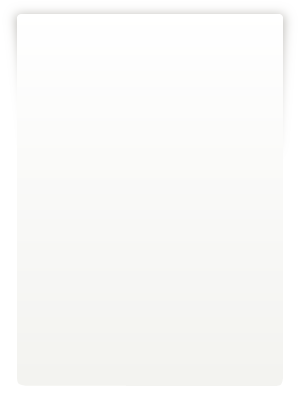
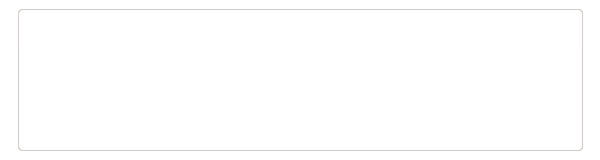
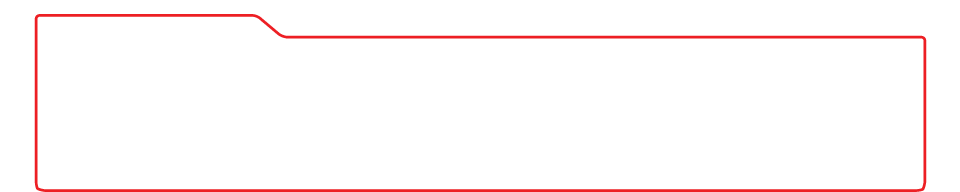
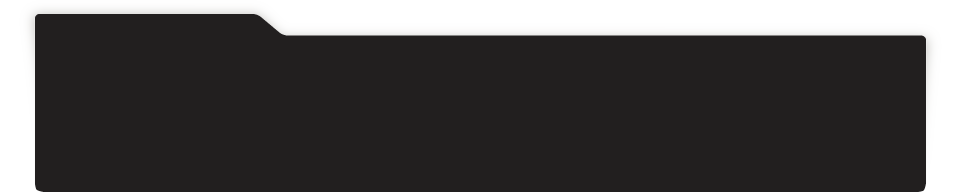
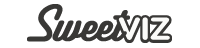
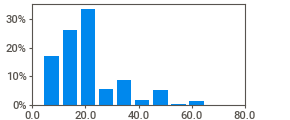
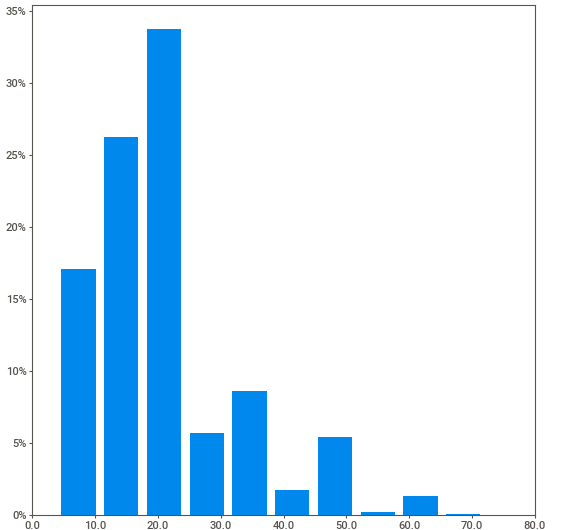
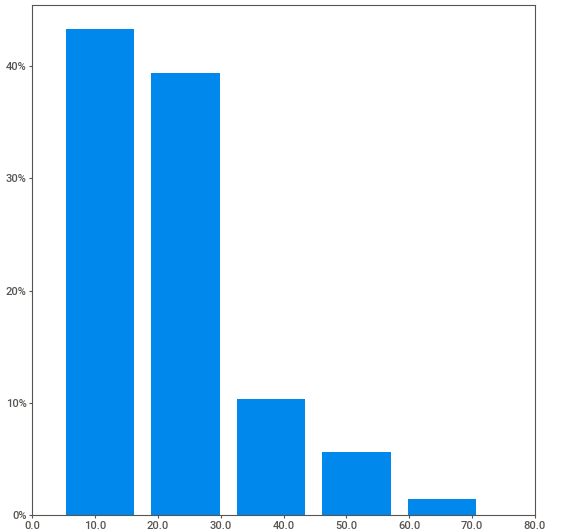
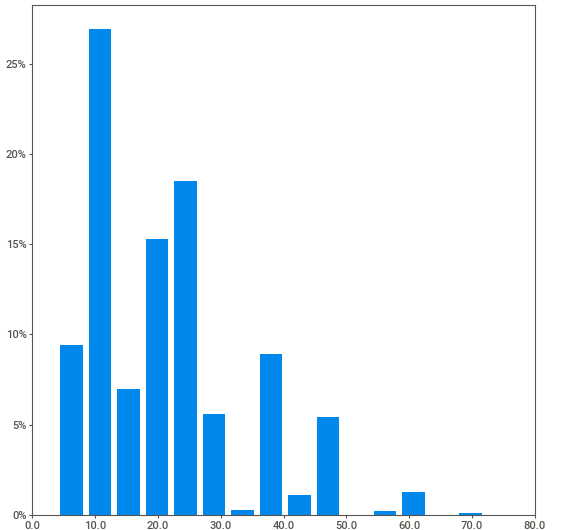
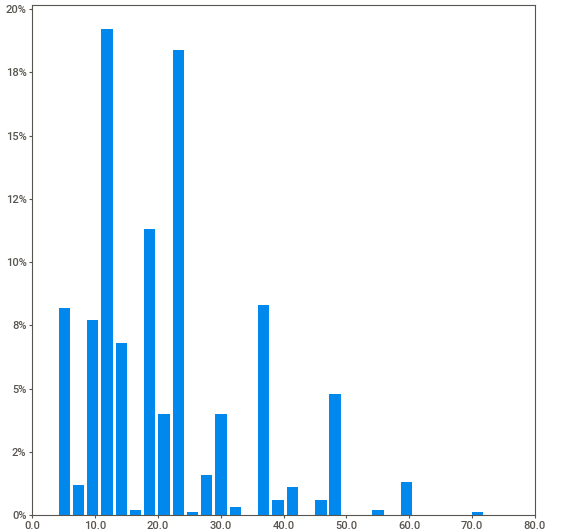
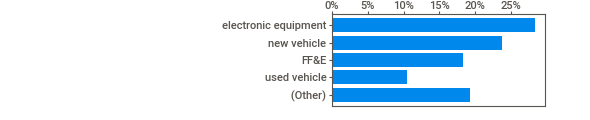
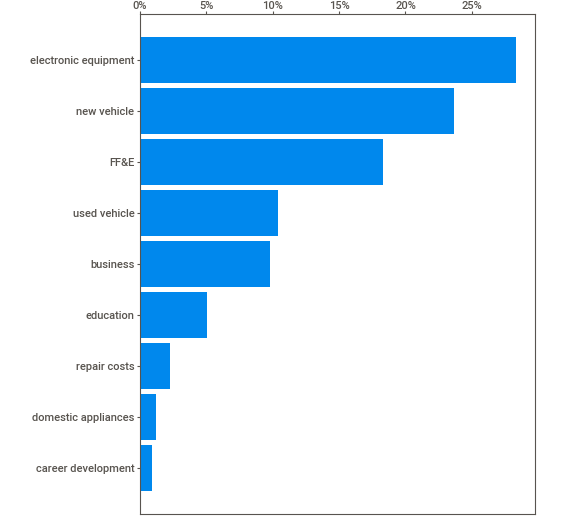
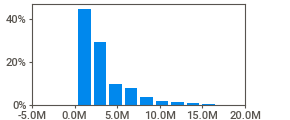
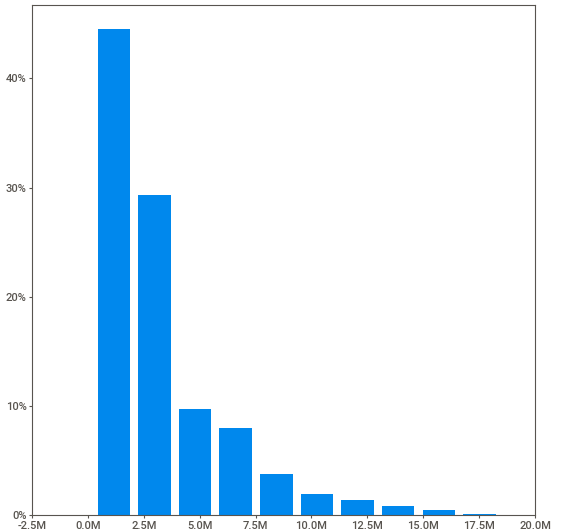
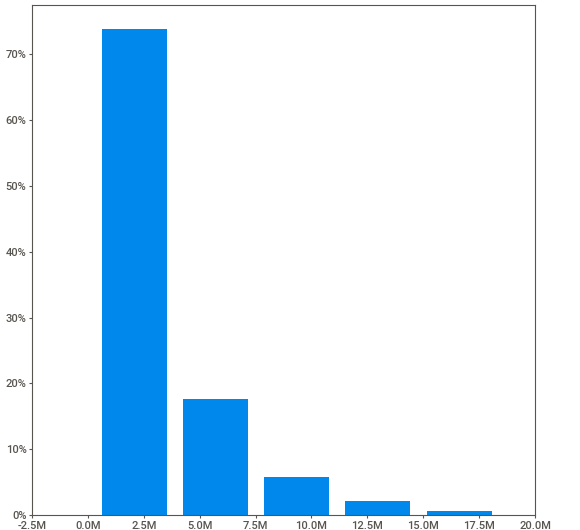
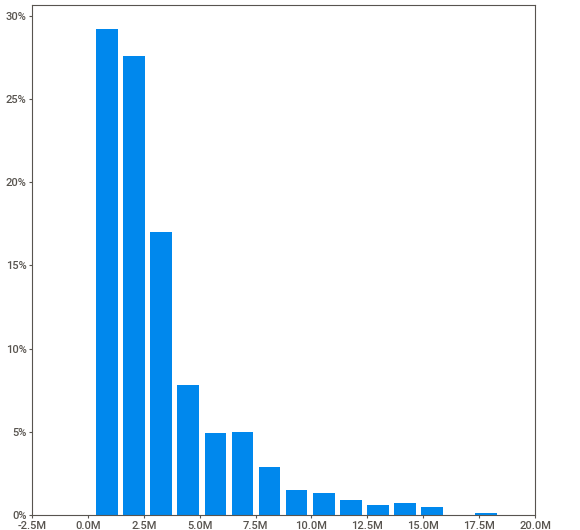
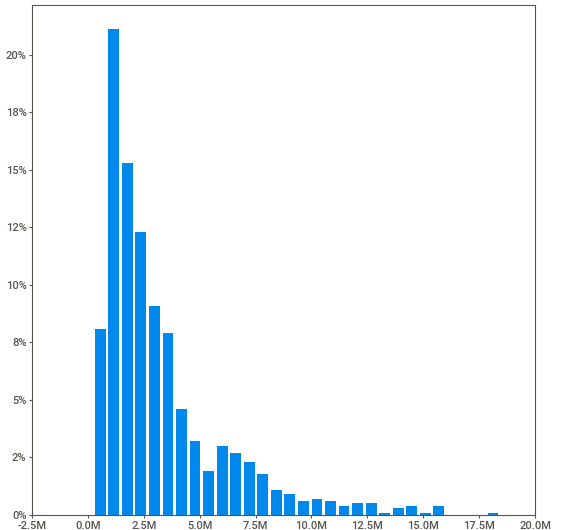
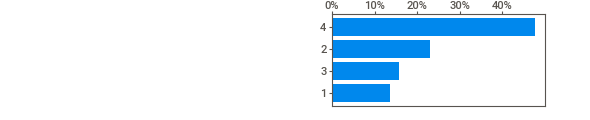
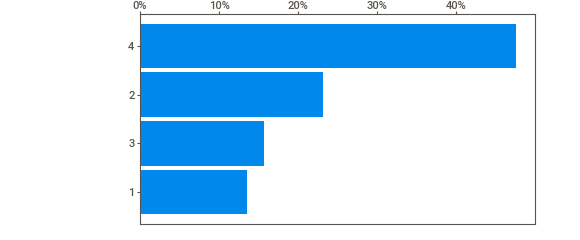
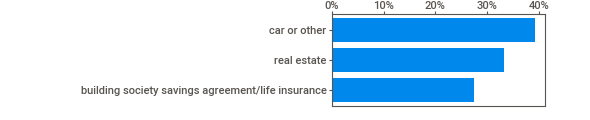
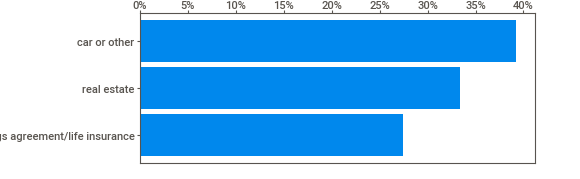
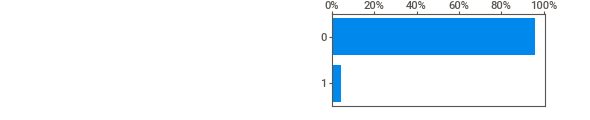
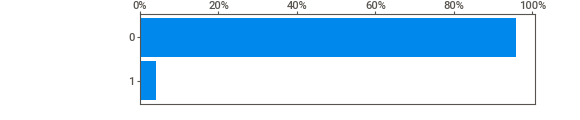
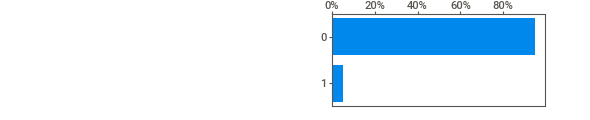
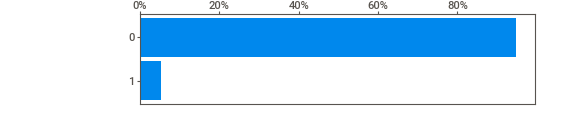
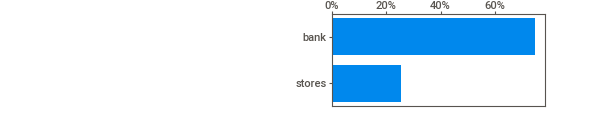
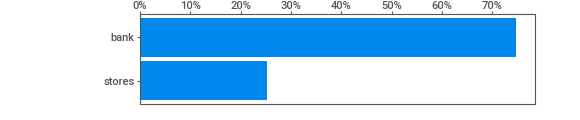
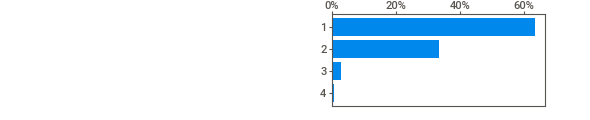
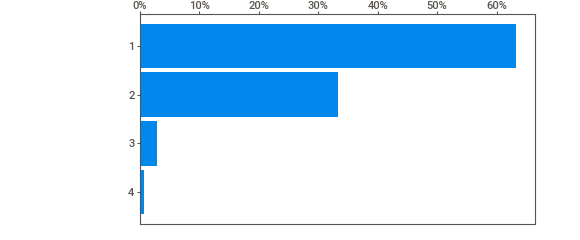
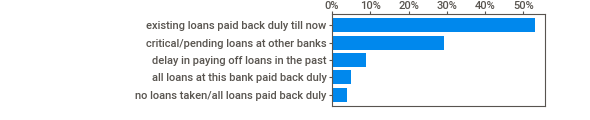
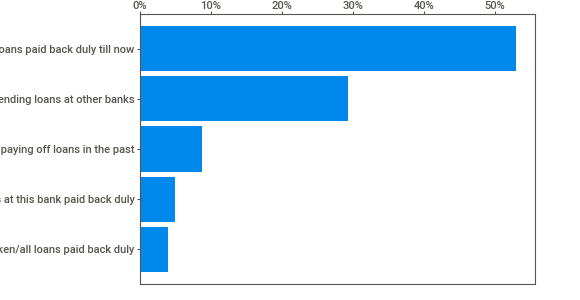
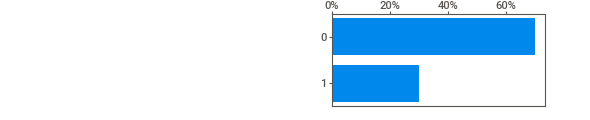
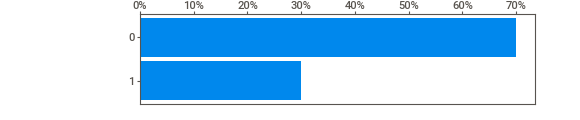
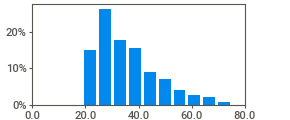
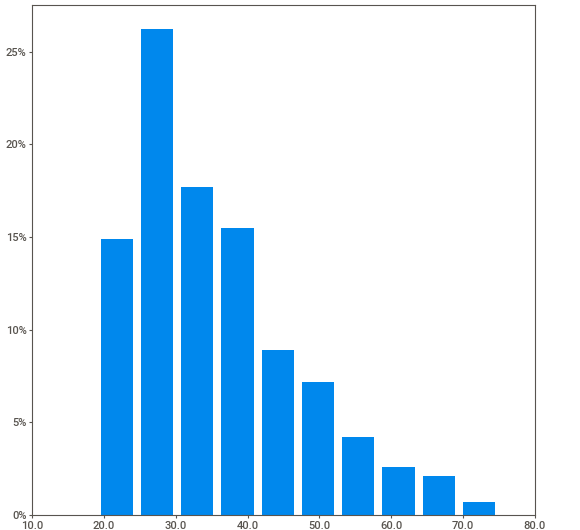
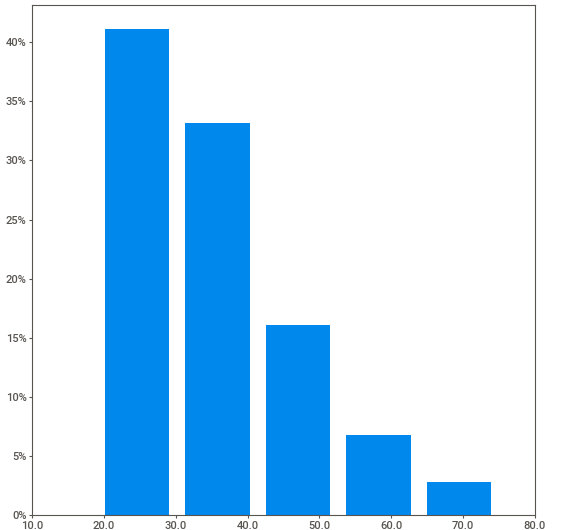
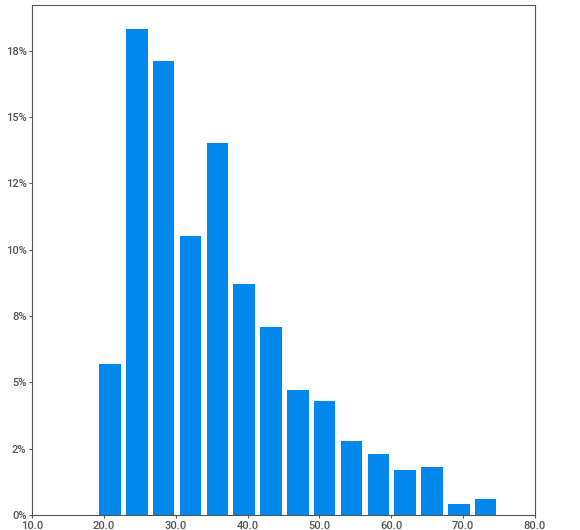
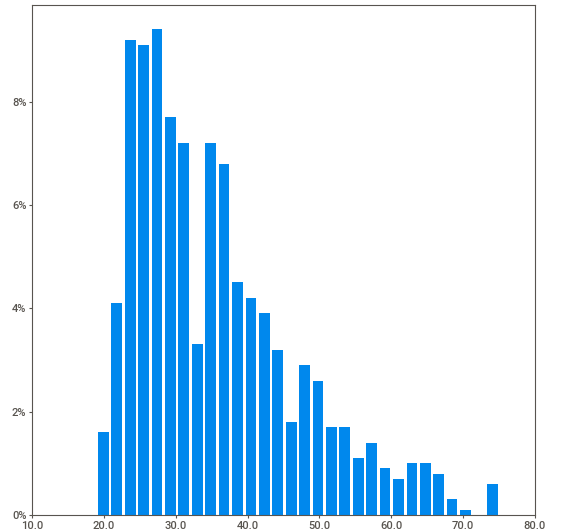
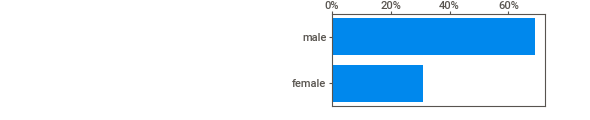
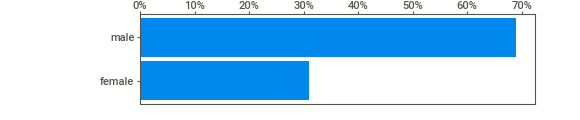
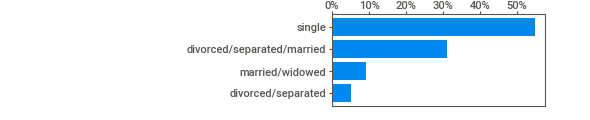
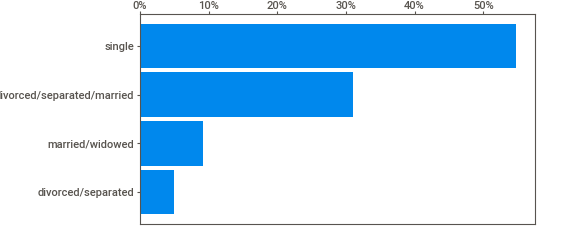
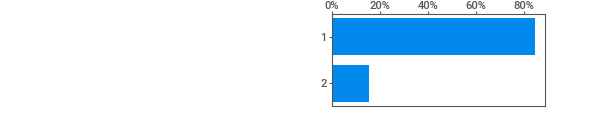
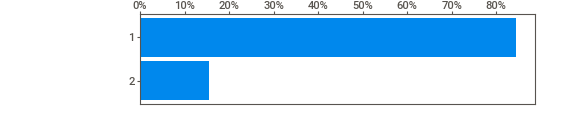
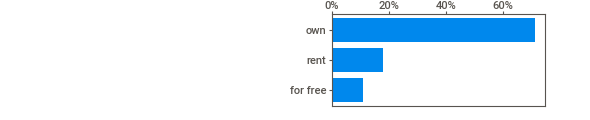
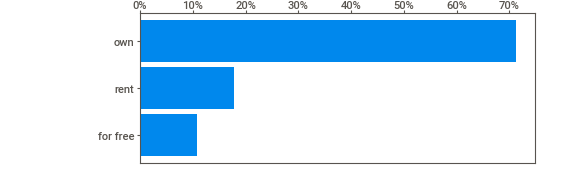
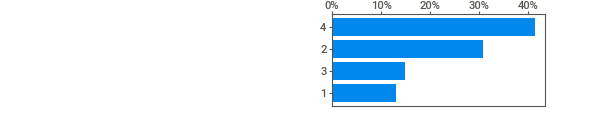
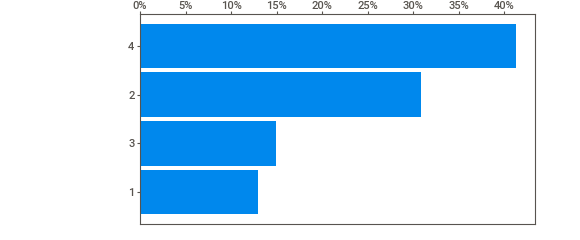
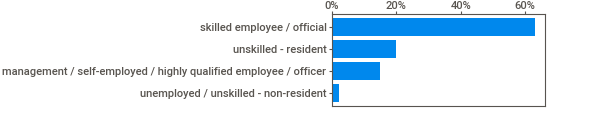
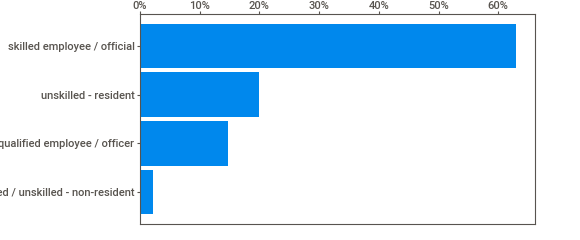
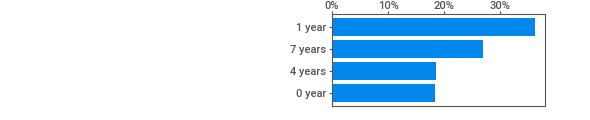
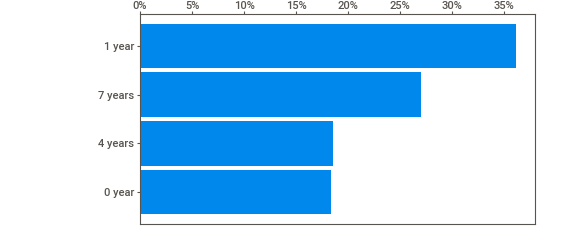
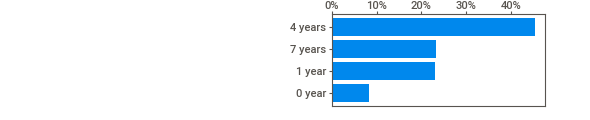
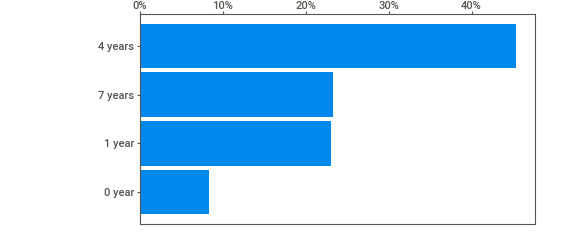
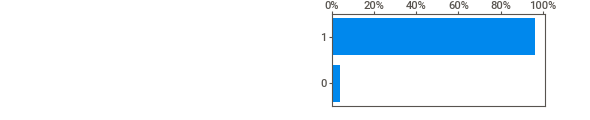
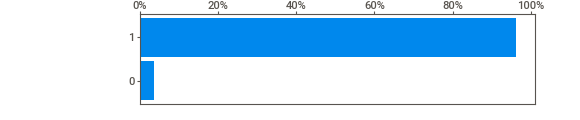
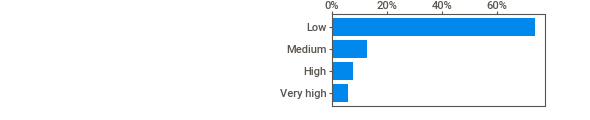
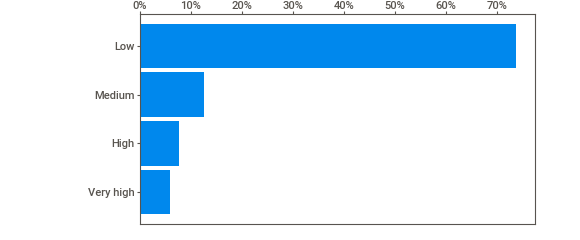
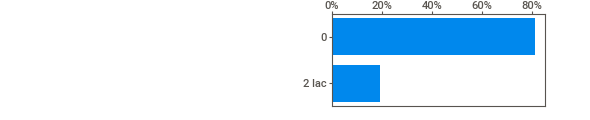
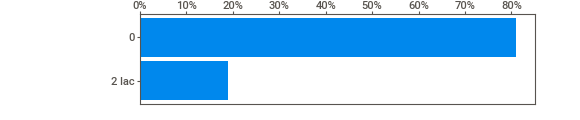
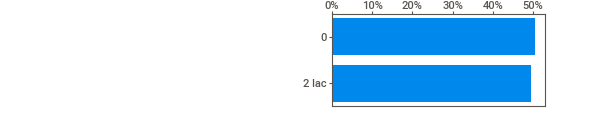
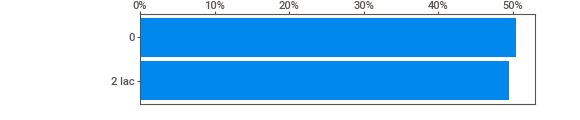
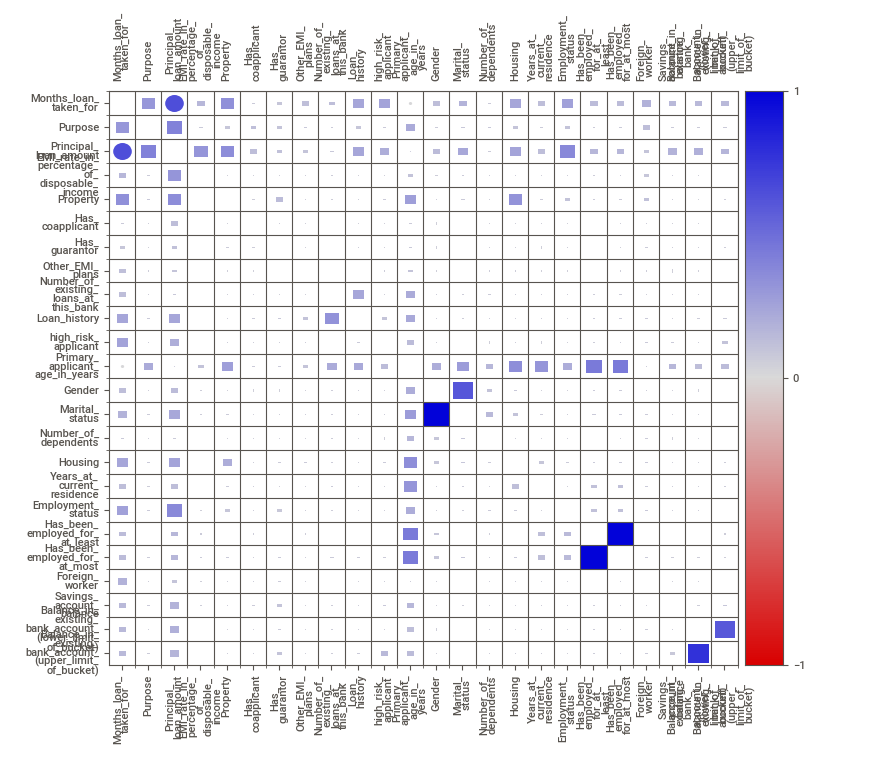
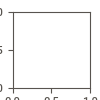

In [ ]:
#autoEDA
!pip install sweetviz 
import sweetviz
autoEDA = sweetviz.analyze(df.drop(to_drop,axis=1))
autoEDA.show_notebook()

#### Bespoke EDA

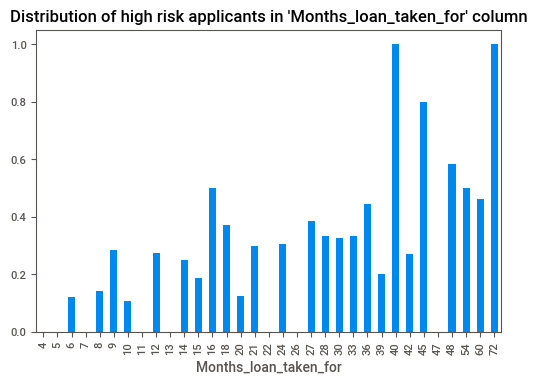

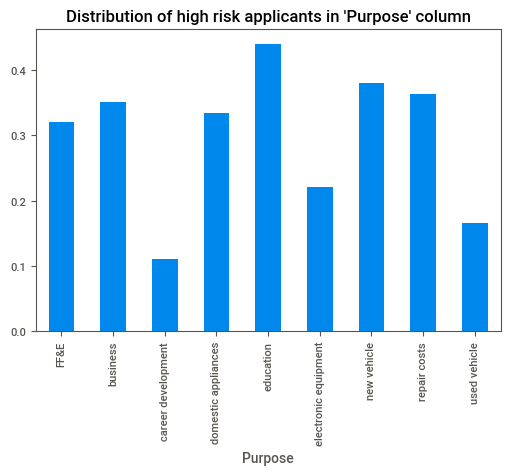

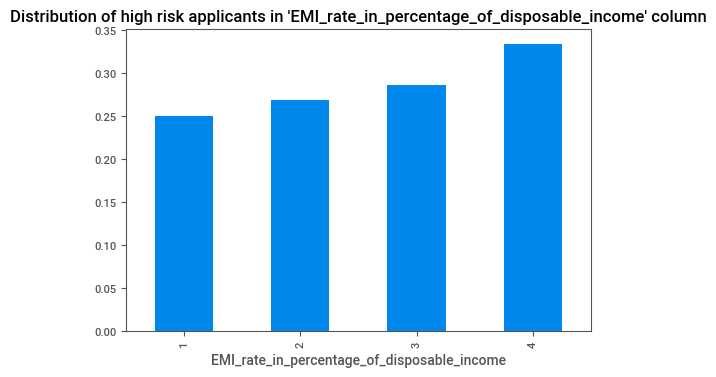

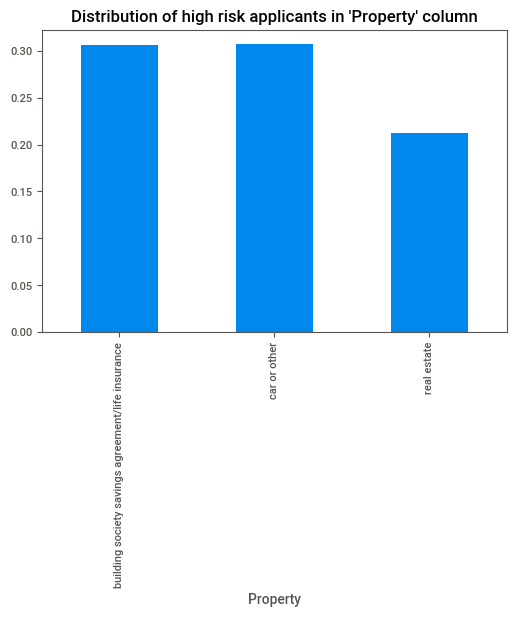

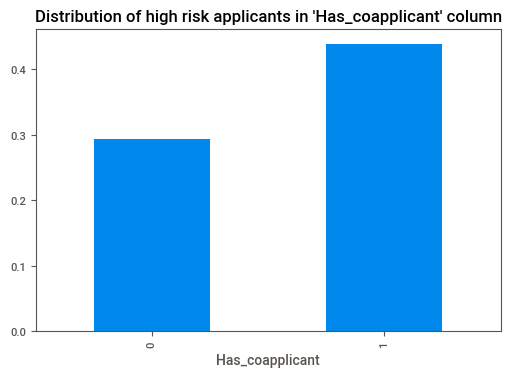

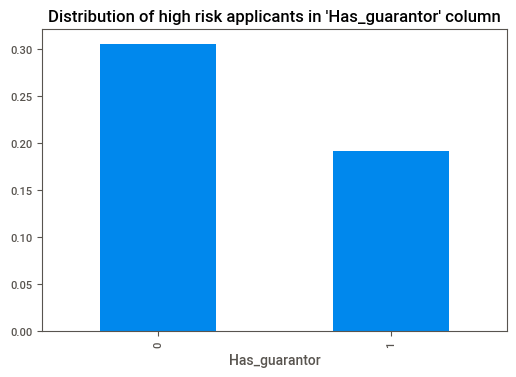

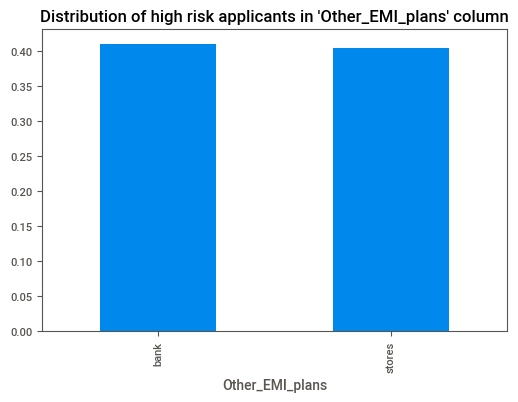

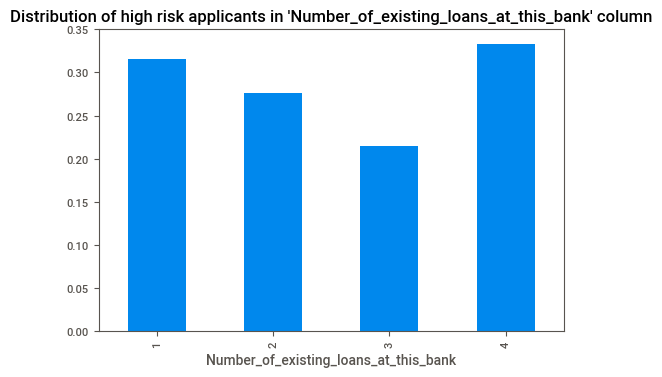

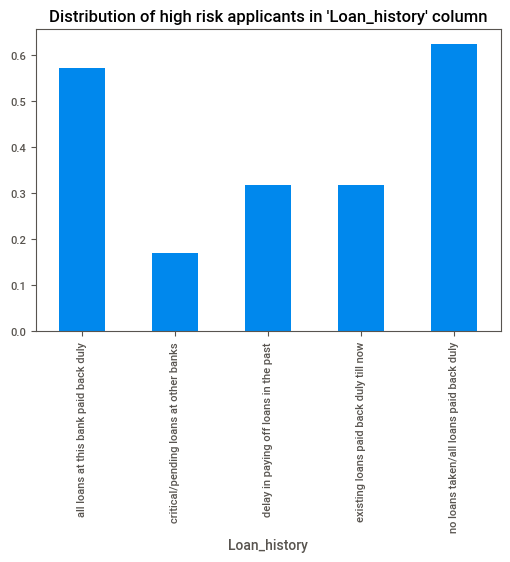

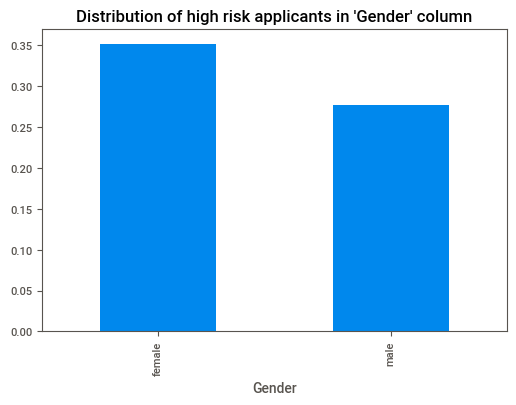

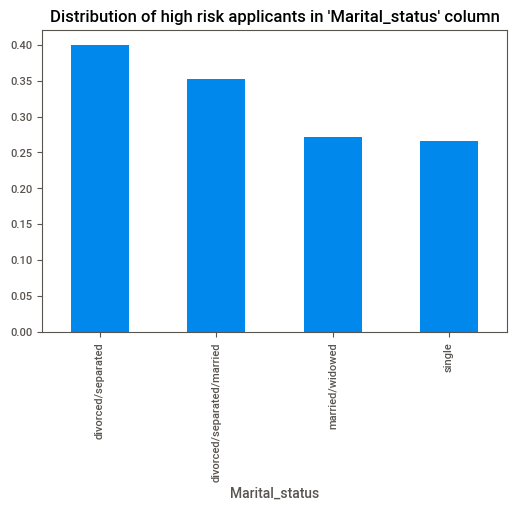

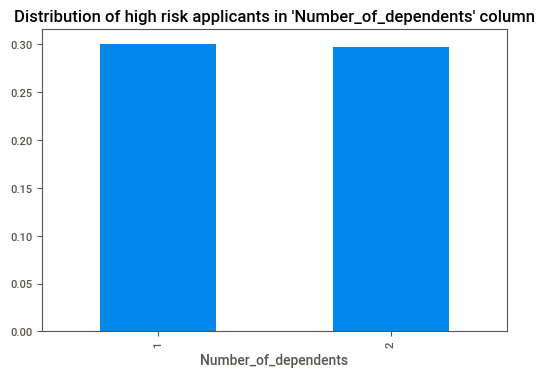

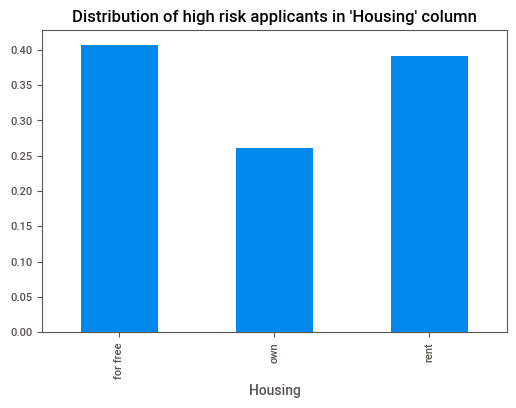

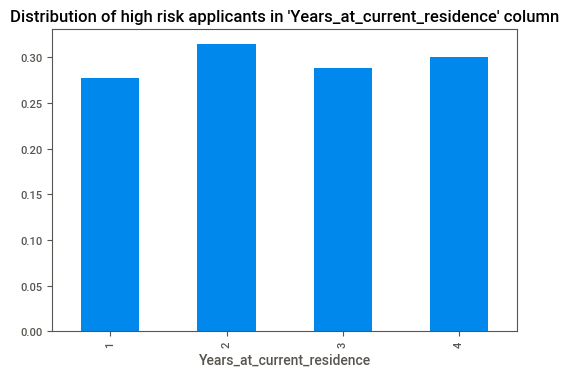

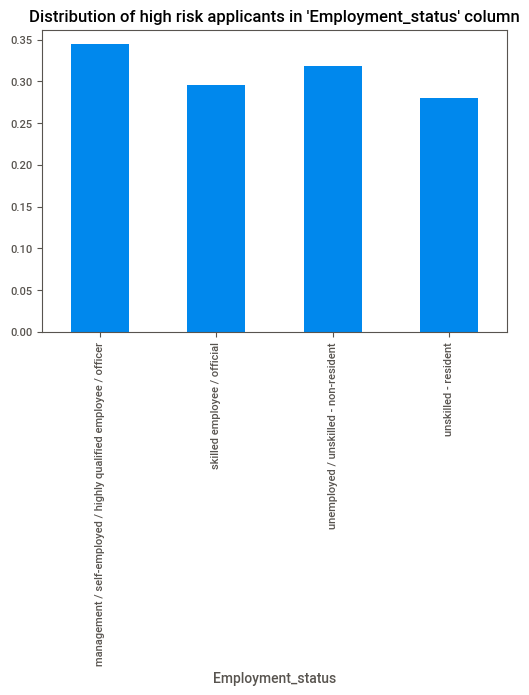

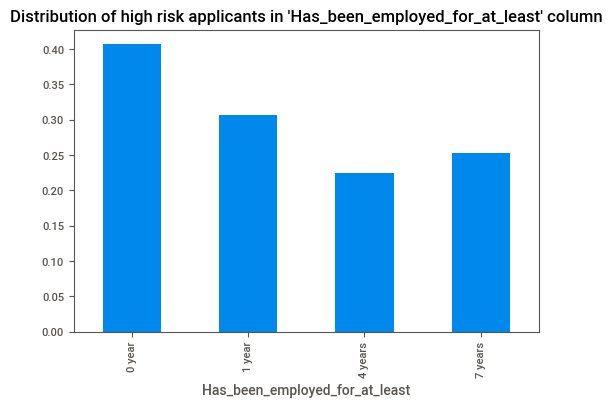

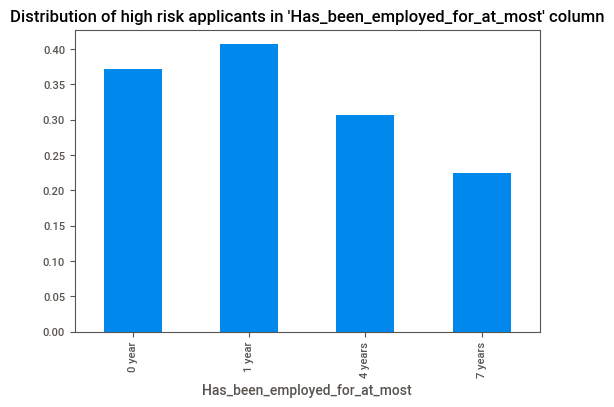

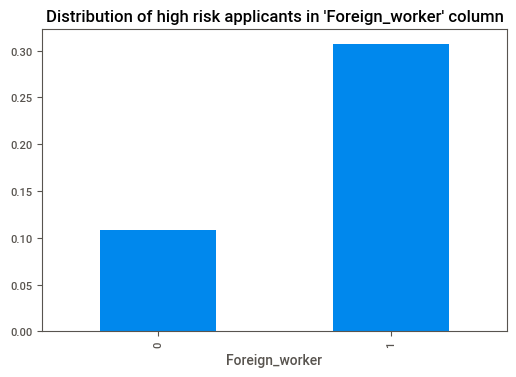

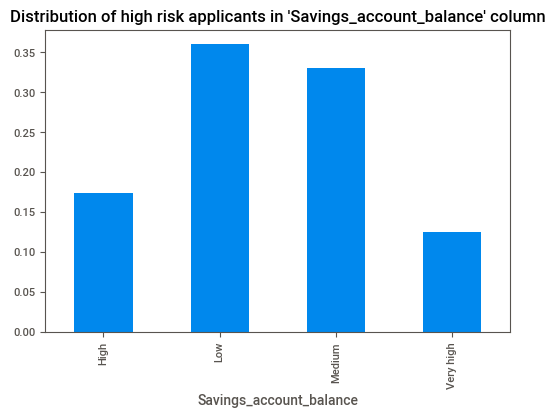

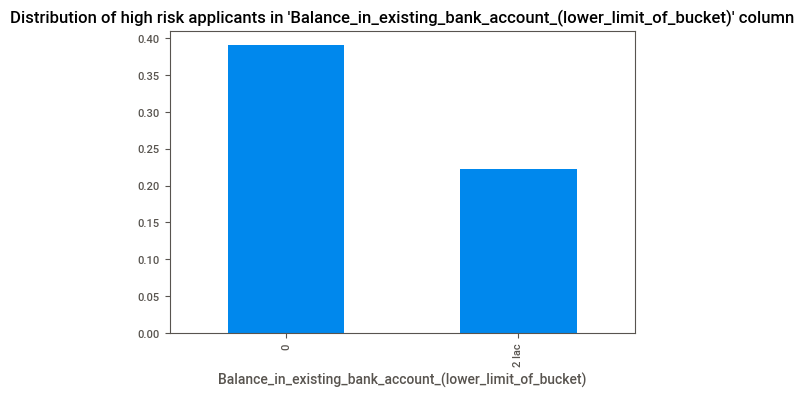

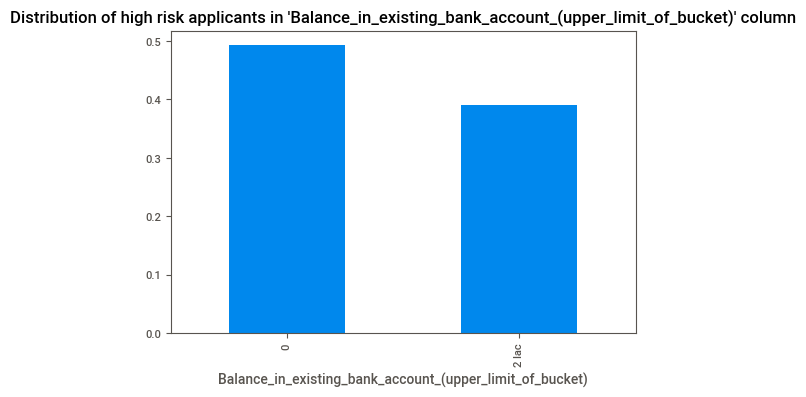

In [ ]:
#grouping by target column
target = 'high_risk_applicant'
to_drop = to_drop + ['Principal_loan_amount']

#making list of columns to check
#taking all the columns with a cardinality of 2
unique = df.nunique()
list_cols = list(df.drop(to_drop,axis=1).columns) 
#excluding target column
list_cols.remove(target)



for col in list_cols:
    s = df.groupby(col)[target].mean()
    s.plot(kind='bar')
    plt.title(f"Distribution of high risk applicants in '{col}' column")
    plt.show()

    print()

    


## Insights


### From correlation heatmap


*   There is a slight positive correlation between Principal loan amount and the months the loan is taken for. This is justified as the time for which the loan is taken will be higher for larger loans.

### From autoEDA


*   Months_loan_taken_for varies from **4 to 72**. **75%** of the applicants have taken loans for a **term** of **less than or equal to 2 years**
*   The reason for which **most** people have taken a loan is **electronic equipment**, followed by vehicle.

*   **75%** of people have taken loans for **less than 4 million**.
*   **Most** of the applicants have **4%** as **EMI rate in percentage of disposable income**.

*   **More than 60%** of the applicants **own a car or a real estate**. Data for **15%** of applicants is **missing** for this feature.
*   **96%** of the applicants **don't have co-applicants**.
*   **95%** of the applicants **don't have guarantor**.
*   More than **60%** of the applicants have at least 1 loan at this bank.
*   **53%** of the applicants have paid back their existing loans duly.
*   **More than 70%** of the applicants have been classified as **low credit risk**.
*   **50%** of the applicants are between **20 and 30 years of age**.
*   **69%** of the applicants are **Male**.
*   More than **50%** of the applicants are single.
*   All of the applicants have at least 1 dependent.
*   **70% own** their own house and **18%** are on **rented** houses.
*   **63%** are skiled employees and **15%** are either self-employed,highly qualified or an officer.

*  **4%** of the applicants are foreign workers.
*  **73%** of the applicants have low balance in their savings account.





### From bespoke EDA and pairplots


Distribution of High risk applicants
* Applicants who have taken loan for **40 or 72 months** are more **high risk** compared to those for other terms .
* Applicants who have taken an **education loan** are more **high risk** than those who have taken it for other purposes.
* Applicants who have **EMI rate in percentage of disposable income** as **4%** are more **high risk**.
* Applicants who have **4 loans** at the bank are more **high risk**.
* Applicants who don't have a guarantor are more **high risk**.
* Applicants who have EMI rate in percentage of disposable income as 4% are more **high risk**.
* Applicants who are divorced/separated are more **high risk**.
* Applicants who are foreign workers are more **high risk**.
* Applicants who have low savings account balance are **high risk**


# 2.Which of these segments / sub-segments would you propose be approved?

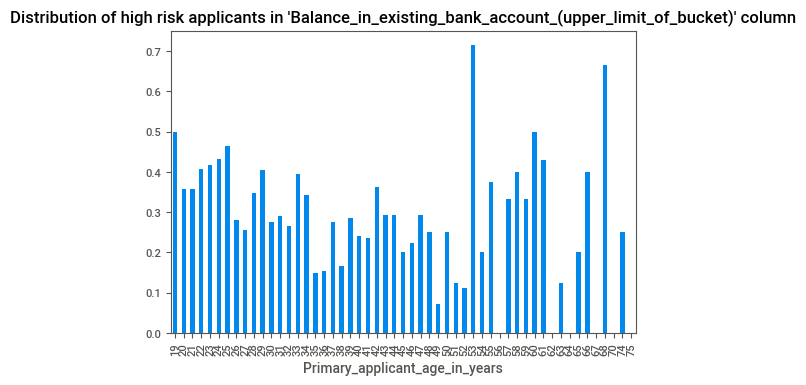

In [ ]:
s = df.groupby('Primary_applicant_age_in_years')[target].mean()
s.plot(kind='bar')
plt.title(f"Distribution of high risk applicants in '{col}' column")
plt.show()

* A person with critical credit history would not be creditworthy.
* A clear trend is not observed  in age among high risk applicants.
* A person with some credit accounts which are fully paid regularly then he/she may be creditworthy. If the person has many credit accounts and not enough income to accomodate one more loan, then he/she may not be creditworthy.

# 3. Observations on the data

In [ ]:
#skewness of the data
df.high_risk_applicant.value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

* The dataset has 1000 unique applicants data
* The dataset is imbalanced as 70% are low risk and 30% are high risk applicants

*   Months_loan_taken_for varies from **4 to 72**. **75%** of the applicants have taken loans for a **term** of **less than or equal to 2 years**
*   The reason for which **most** people have taken a loan is **electronic equipment**, followed by vehicle.

*   **75%** of people have taken loans for **less than 4 million**.
*   **Most** of the applicants have **4%** as **EMI rate in percentage of disposable income**.

*   **More than 60%** of the applicants **own a car or a real estate**. Data for **15%** of applicants is **missing** for this feature.
*   **96%** of the applicants **don't have co-applicants**.
*   **95%** of the applicants **don't have guarantor**.
*   More than **60%** of the applicants have at least 1 loan at this bank.
*   **53%** of the applicants have paid back their existing loans duly.
*   **More than 70%** of the applicants have been classified as **low credit risk**.
*   **50%** of the applicants are between **20 and 30 years of age**.
*   **69%** of the applicants are **Male**.
*   More than **50%** of the applicants are single.
*   All of the applicants have at least 1 dependent.
*   **70% own** their own house and **18%** are on **rented** houses.
*   **63%** are skiled employees and **15%** are either self-employed,highly qualified or an officer.

*  **4%** of the applicants are foreign workers.
*  **73%** of the applicants have low balance in their savings account.



